In [1]:
import tensorflow as tf
from tensorflow import keras

In [18]:
plt = plotter()
%matplotlib inline

In [9]:
BATCH_SIZE = 32

### MNIST

In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
(mx_train, my_train),(mx_test, my_test) = mnist.load_data()
mx_train, mx_test = mx_train / 255.0, mx_test / 255.0

In [6]:
mmodel = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
mmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
mhist = mmodel.fit(mx_train, my_train, batch_size=BATCH_SIZE, epochs=5, validation_data=(mx_test, my_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0828 - acc: 0.9742 - val_loss: 0.0850 - val_acc: 0.9735
Epoch 2/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0608 - acc: 0.9808 - val_loss: 0.0670 - val_acc: 0.9791
Epoch 3/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0480 - acc: 0.9847 - val_loss: 0.0668 - val_acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0404 - acc: 0.9871 - val_loss: 0.0621 - val_acc: 0.9813
Epoch 5/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0340 - acc: 0.9887 - val_loss: 0.0652 - val_acc: 0.9820


In [17]:
mmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


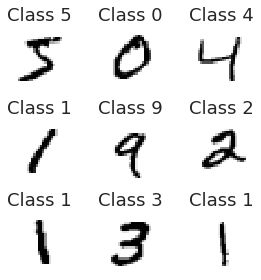

In [50]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(5, 4))
axs = axs.flatten()
for i in range(9):
    ax = axs[i]
    ax.imshow(mx_train[i], cmap='gray_r', interpolation='none')
    ax.set_title("Class {}".format(my_train[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
fig.savefig('../slides/images/mnist_classify.png', dpi=300)

### CIFAR-10

In [12]:
from tensorflow.keras.datasets import cifar10

In [62]:
(cx_train, cy_train0), (cx_test, cy_test0) = cifar10.load_data()
cy_train = keras.utils.to_categorical(cy_train0, 10)
cy_test = keras.utils.to_categorical(cy_test0, 10)
cx_train = cx_train.astype('float32')/255
cx_test = cx_test.astype('float32')/255

In [14]:
# CIFAR like model
cmodel = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
])
cmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
chist = cmodel.fit(cx_train, cy_train, batch_size=BATCH_SIZE, epochs=5, validation_data=(cx_test, cy_test))

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.5591 - acc: 0.4293 - val_loss: 1.2520 - val_acc: 0.5557
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.1776 - acc: 0.5824 - val_loss: 1.0051 - val_acc: 0.6431
Epoch 3/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.0270 - acc: 0.6359 - val_loss: 0.9248 - val_acc: 0.6755
Epoch 4/5
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.9316 - acc: 0.6725 - val_loss: 0.8116 - val_acc: 0.7199
Epoch 5/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.8684 - acc: 0.6938 - val_loss: 0.7858 - val_acc: 0.7210


In [16]:
cmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  18496     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
__________

In [67]:
cy_train0[5, 0]

1

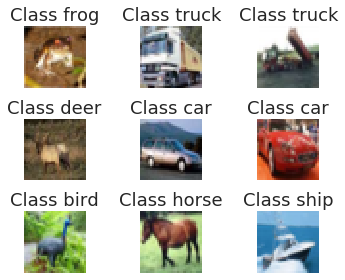

In [72]:
ctext = ['plane', 'car', 'bird', 'cat', 'deer', 'dot', 'frog', 'horse', 'ship', 'truck']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(5, 4))
axs = axs.flatten()
for i in range(9):
    ax = axs[i]
    ax.imshow(cx_train[i], interpolation='none')
    ax.set_title("Class {}".format(ctext[cy_train0[i,0]]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
fig.savefig('../slides/images/cifar_classify.png', dpi=300)